<a href="https://colab.research.google.com/github/ddecollo/DS320/blob/main/DS320_PennState_Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 2
How well did Penn State alumni performed in the NFL during week 1?

## import packages

In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

## import data

In [ ]:
games = pd.read_csv("https://raw.githubusercontent.com/willzwetolitz/DS320/main/Data/games2.csv")
players = pd.read_csv("https://raw.githubusercontent.com/willzwetolitz/DS320/main/Data/players.csv")
plays = pd.read_csv("https://raw.githubusercontent.com/willzwetolitz/DS320/main/Data/plays.csv")
week1 = pd.read_csv("/content/week1.csv")

## Clean Games
remove the rows that contain NA values. This will result in only having the games from week 1

In [ ]:
#all the week 1 games, including the winners
games.dropna(how="all", inplace=True)
games

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week,Winner
0,2.018091e+09,09/06/2018,20:20:00,PHI,ATL,1.0,PHI
1,2.018091e+09,09/09/2018,13:00:00,CLE,PIT,1.0,TIE
2,2.018091e+09,09/09/2018,13:00:00,IND,CIN,1.0,CIN
3,2.018091e+09,09/09/2018,13:00:00,MIA,TEN,1.0,MIA
4,2.018091e+09,09/09/2018,13:00:00,BAL,BUF,1.0,BAL
5,2.018091e+09,09/09/2018,13:00:00,NE,HOU,1.0,NE
6,2.018091e+09,09/09/2018,13:00:00,NYG,JAX,1.0,JAX
7,2.018091e+09,09/09/2018,13:00:00,NO,TB,1.0,TB
8,2.018091e+09,09/09/2018,16:25:00,ARI,WAS,1.0,WAS
9,2.018091e+09,09/09/2018,16:25:00,CAR,DAL,1.0,CAR


## Clean Players

In [ ]:
#format birthday
players['birthDate']= pd.to_datetime(players['birthDate'])

In [ ]:
#convert height
for i in range(len(players['nflId'])):
  height = players['height'][i]
  if '-' in height:
    height_lst = height.split('-')
    height = int(height_lst[0]) * 12 + int(height_lst[1])
    players.at[i,'height'] = height

In [ ]:
#players.to_csv('players_cleaned.csv')

## Penn State Players
Relevent names in the 'collegeName' column:
* Penn State

Not found in the 'collegeName' column:
* Pennsylvania State University
* PSU
* Penn State University

In [ ]:
psu_players = players[players['collegeName'].str.contains("Penn State")]
psu_players

,nflId,height,weight,birthDate,collegeName,position,displayName
103,2552633,79,250,1994-06-04,Penn State,TE,Jesse James
202,2560994,78,252,1995-10-03,Penn State,TE,Mike Gesicki
283,2558105,73,209,1996-02-27,Penn State,WR,Chris Godwin
359,2560968,72,233,1997-02-09,Penn State,RB,Saquon Barkley
421,496937,74,245,1986-07-22,Penn State,ILB,Sean Lee
455,2552385,72,214,1993-04-29,Penn State,FS,Adrian Amos
470,2543509,74,220,1993-08-24,Penn State,WR,Allen Robinson
620,2556828,71,191,1993-09-15,Penn State,CB,Trevor Williams
726,2539293,74,236,1991-01-17,Penn State,ILB,Gerald Hodges
781,2561002,73,206,1995-03-10,Penn State,WR,DaeSean Hamilton


In [ ]:
len(psu_players)

19

## Compare height vs weight for Penn State alumni

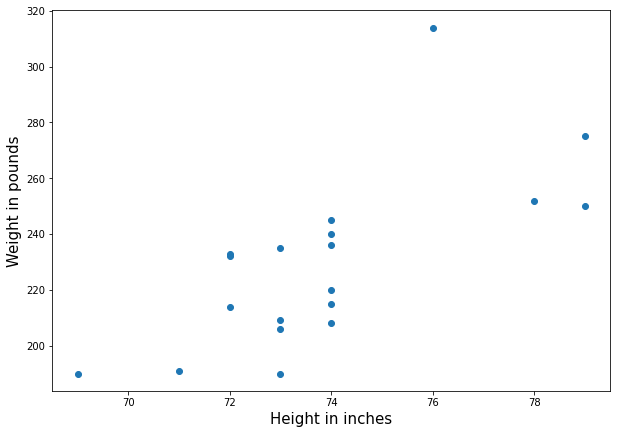

In [ ]:
# Figure Size
fig = plt.figure(figsize =(10, 7))

# Scatter Plot
plt.scatter(psu_players['height'].astype(int), psu_players['weight'].astype(int))

#axis label
plt.xlabel("Height in inches", size=15)
plt.ylabel("Weight in pounds", size=15)

# Show Plot
plt.show()

In [ ]:
week1.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-09-07T01:07:14.599Z,91.73,26.67,0.00,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,2.0,QB,1,away,2018090600,75,left,NaN
1,2018-09-07T01:07:14.599Z,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,75,left,NaN
2,2018-09-07T01:07:14.599Z,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,75,left,HITCH
3,2018-09-07T01:07:14.599Z,86.31,22.01,0.09,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,24.0,FS,1,home,2018090600,75,left,NaN
4,2018-09-07T01:07:14.599Z,90.78,36.15,0.00,0.00,0.00,257.61,193.97,None,2533040.0,Mohamed Sanu,12.0,WR,1,away,2018090600,75,left,HITCH


In [ ]:
plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


In [ ]:
games.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week,Winner
0,2.018091e+09,09/06/2018,20:20:00,PHI,ATL,1.0,PHI
1,2.018091e+09,09/09/2018,13:00:00,CLE,PIT,1.0,TIE
2,2.018091e+09,09/09/2018,13:00:00,IND,CIN,1.0,CIN
3,2.018091e+09,09/09/2018,13:00:00,MIA,TEN,1.0,MIA
4,2.018091e+09,09/09/2018,13:00:00,BAL,BUF,1.0,BAL


## Penn State Week 1 data

In [ ]:
lst = psu_players['nflId'].values.tolist()
psu_week1 = week1[week1['nflId'].isin(lst)]
psu_week1

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
81378,2018-09-09T17:03:55.799Z,35.66,22.02,0.00,0.00,0.01,123.47,311.57,None,2552633.0,Jesse James,81.0,TE,1,away,2018090901,72,right,SLANT
81420,2018-09-09T17:03:55.900Z,35.66,22.02,0.00,0.00,0.00,123.47,311.07,None,2552633.0,Jesse James,81.0,TE,2,away,2018090901,72,right,SLANT
81462,2018-09-09T17:03:56.000Z,35.66,22.02,0.00,0.00,0.00,123.47,310.79,None,2552633.0,Jesse James,81.0,TE,3,away,2018090901,72,right,SLANT
81504,2018-09-09T17:03:56.099Z,35.65,22.02,0.00,0.00,0.00,122.53,309.45,None,2552633.0,Jesse James,81.0,TE,4,away,2018090901,72,right,SLANT
81546,2018-09-09T17:03:56.200Z,35.65,22.02,0.00,0.00,0.01,121.71,307.63,None,2552633.0,Jesse James,81.0,TE,5,away,2018090901,72,right,SLANT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832062,2018-09-10T03:29:13.900Z,81.64,24.75,0.94,0.43,0.10,155.30,125.67,None,2552385.0,Adrian Amos,38.0,FS,57,away,2018090912,4043,right,NaN
832075,2018-09-10T03:29:14.000Z,81.72,24.70,0.91,0.39,0.09,155.30,125.58,None,2552385.0,Adrian Amos,38.0,FS,58,away,2018090912,4043,right,NaN
832088,2018-09-10T03:29:14.099Z,81.81,24.65,0.90,0.30,0.10,159.68,123.16,None,2552385.0,Adrian Amos,38.0,FS,59,away,2018090912,4043,right,NaN
832101,2018-09-10T03:29:14.200Z,81.88,24.60,0.86,0.37,0.09,163.79,121.60,pass_outcome_incomplete,2552385.0,Adrian Amos,38.0,FS,60,away,2018090912,4043,right,NaN


In [ ]:
len(week1)

986022

In [ ]:
len(psu_week1)

14286

## Penn State Plays data
PlayID is unique for every game, but it can occure for multiple games. You need gameID and playID to properly filter

In [ ]:
playlst = psu_week1['playId'].values.tolist()
gamelst = psu_week1['gameId'].unique().tolist()
psu_plays = plays[(plays['playId'].isin(playlst)) & (plays['gameId'].isin(gamelst))]
psu_plays

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
84,2018090901,72,(14:24) (Shotgun) B.Roethlisberger pass short ...,1,2,7,PIT,play_type_pass,PIT,28,...,0.0,14:24:00,38.0,NaN,NaN,C,5,5,-0.586901,False
85,2018090901,96,(13:37) (Shotgun) B.Roethlisberger pass incomp...,1,3,2,PIT,play_type_pass,PIT,33,...,0.0,13:37:00,43.0,NaN,NaN,I,0,0,-1.695070,False
89,2018090901,339,(10:08) B.Roethlisberger pass short right to J...,1,1,10,PIT,play_type_pass,PIT,20,...,0.0,10:08:00,30.0,NaN,NaN,C,12,12,0.938697,False
90,2018090901,405,(8:10) (Shotgun) B.Roethlisberger pass incompl...,1,2,9,PIT,play_type_pass,PIT,43,...,0.0,08:10:00,53.0,NaN,NaN,I,0,0,-0.911614,False
91,2018090901,439,(8:05) (Shotgun) B.Roethlisberger pass short r...,1,3,9,PIT,play_type_pass,PIT,43,...,0.0,08:05:00,53.0,IBW,PIT 11,C,0,0,-1.770704,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18629,2018090906,1188,(11:30) (Shotgun) R.Fitzpatrick pass incomplet...,2,3,7,TB,play_type_unknown,NO,15,...,NaN,NaN,NaN,DH;OPI,NO 21;TB 10,I,0,0,-0.000288,False
18630,2018090906,2372,(12:43) (Shotgun) R.Fitzpatrick pass incomplet...,3,2,7,TB,play_type_unknown,TB,49,...,NaN,NaN,NaN,RPS,NO 93,I,0,15,1.376488,False
18637,2018090910,236,(11:03) (Shotgun) C.Newton pass incomplete sho...,1,3,10,CAR,play_type_unknown,CAR,32,...,NaN,NaN,NaN,RPS,DAL 90,I,0,15,2.413902,False
18641,2018090912,1906,(13:07) (Shotgun) M.Trubisky pass incomplete s...,3,2,7,CHI,play_type_unknown,CHI,45,...,NaN,NaN,NaN,RPS,GB 96,I,0,15,1.444223,False


In [ ]:
len(psu_plays)

223